# Portfolio 4 - User Behavior Classification and Prediction on User behaviour on Mobile

**Source of dataset:** https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset

**Dataset Description:** The dataset contains 661 records and 11 columns with features related to demographic data (age, gender), device usage metrics (app usage time, screen-on time, battery drain, data usage), and the target class (User Behavior Class). The goal of this analysis is to explore the relationships between these variables and classify users into different behavior segments based on their usage patterns.

The **Dataset Glossary** below provides the description of each feature:

| **Column Name**                | **Description**                                                  |
|--------------------------------|------------------------------------------------------------------|
| User ID                        | Unique identifier for each user                                  |
| Device Model                   | The model of the user's mobile device                            |
| Operating System               | The operating system used by the device (Android, iOS)           |
| App Usage Time (min/day)       | The amount of time the user spends using apps per day (minutes)  |
| Screen On Time (hours/day)     | The amount of time the screen is on per day (hours)              |
| Battery Drain (mAh/day)        | The battery consumption per day (in milliamp hours)              |
| Number of Apps Installed       | Total number of apps installed on the device                     |
| Data Usage (MB/day)            | Amount of data used per day (in megabytes)                       |
| Age                            | Age of the user                                                  |
| Gender                         | Gender of the user (Male, Female)                                |
| User Behavior Class            | Categorisation of user behavior (1, 2, 3, 4, representing different behavior patterns) |

## I. Objective of the analysis:

The main objectives of this analysis can be defined through the following questions:
- **Understand Key Influences:** (Correlation Analysis)
    - Question: What factors have the most significant influence on user behavior and segmentation?
- **Segment Users into Behavioral Categories:** (Clustering Analysis)
    - Question: How can we categorise users into distinct segments based on their behavior patterns?
- **Predict User Behavior:** (Logistic and KNN Model Analysis)
    - Question: Can we develop a model to predict future user behavior based on their past activities?

## II. Data Preperation and Exploration

In [5]:
# Setting the environment
import pandas as pd
import numpy as np

# Data visualisation
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# Kmeans Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# StandardScaler
from sklearn.preprocessing import StandardScaler

# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

# K-nearest neighbors Model
from sklearn.neighbors import KNeighborsClassifier

# RFE technique
from sklearn.feature_selection import RFE

# Train & Test split and GridSearch CV
from sklearn.model_selection import train_test_split, GridSearchCV


# Supress warnings
import warnings; warnings.simplefilter('ignore')

#### **1. Data Loading and Overview**

In [7]:
# Loading the dataset
df = pd.read_csv('data/User_Behavior_Dataset.csv')
df = df.drop(['User ID'], axis=1)
df.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,Samsung Galaxy S21,Android,580.0,8.710654,3067.110978,87.0,936.044179,52.0,Male,5.0
1,Xiaomi Mi 11,Android,424.0,7.640538,1895.364099,65.0,2910.016467,52.0,Male,4.0
2,OnePlus 9,Android,236.0,3.882955,1408.256001,NaN,2100.828654,21.0,Female,3.0
3,iPhone 12,iOS,488.0,10.137477,3395.776704,92.0,536.309326,48.0,Female,5.0
4,Xiaomi Mi 11,Android,168.0,2.844959,882.167279,22.0,451.903999,50.0,Female,2.0


In [8]:
# Loading basic info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Device Model                660 non-null    object 
 1   Operating System            660 non-null    object 
 2   App Usage Time (min/day)    660 non-null    float64
 3   Screen On Time (hours/day)  660 non-null    float64
 4   Battery Drain (mAh/day)     660 non-null    float64
 5   Number of Apps Installed    660 non-null    float64
 6   Data Usage (MB/day)         660 non-null    float64
 7   Age                         661 non-null    float64
 8   Gender                      660 non-null    object 
 9   User Behavior Class         661 non-null    float64
dtypes: float64(7), object(3)
memory usage: 52.8+ KB


In [9]:
# Summary statistics
df.describe(include="all")

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
count,660,660,660.000000,660.000000,660.000000,660.000000,660.000000,661.000000,660,661.000000
unique,5,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,Xiaomi Mi 11,Android,NaN,NaN,NaN,NaN,NaN,NaN,Male,NaN
freq,140,524,NaN,NaN,NaN,NaN,NaN,NaN,348,NaN
mean,NaN,NaN,273.212106,5.352734,1565.526263,50.530303,935.111078,38.201210,NaN,2.987897
std,NaN,NaN,181.865377,3.202840,886.376945,26.955828,692.785037,12.086195,NaN,1.408794
min,NaN,NaN,30.000000,0.271348,253.766070,10.000000,72.496017,18.000000,NaN,1.000000
25%,NaN,NaN,113.250000,2.681800,751.964156,26.000000,347.426759,27.000000,NaN,2.000000
50%,NaN,NaN,228.000000,4.888168,1562.662251,49.000000,769.075439,37.000000,NaN,3.000000
75%,NaN,NaN,438.750000,7.524173,2237.439842,74.000000,1325.100361,49.000000,NaN,4.000000


#### **2. Data Cleaning**

In [11]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()
missing_values

Device Model                  14
Operating System              14
App Usage Time (min/day)      14
Screen On Time (hours/day)    14
Battery Drain (mAh/day)       14
Number of Apps Installed      14
Data Usage (MB/day)           14
Age                           13
Gender                        14
User Behavior Class           13
dtype: int64

In [12]:
# Handle missing values - Imputing numerical columns with median and categorical columns with mode
numerical_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns

# Impute missing numerical data with median
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
# Impute missing categorical data with mode
df[categorical_cols] = df[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))

# Checking missing value
missing_values_updated = df.isnull().sum()
missing_values_updated

Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [13]:
# Checking for duplicate records in the dataset
duplicate_records = df.duplicated().sum()
duplicate_records

0

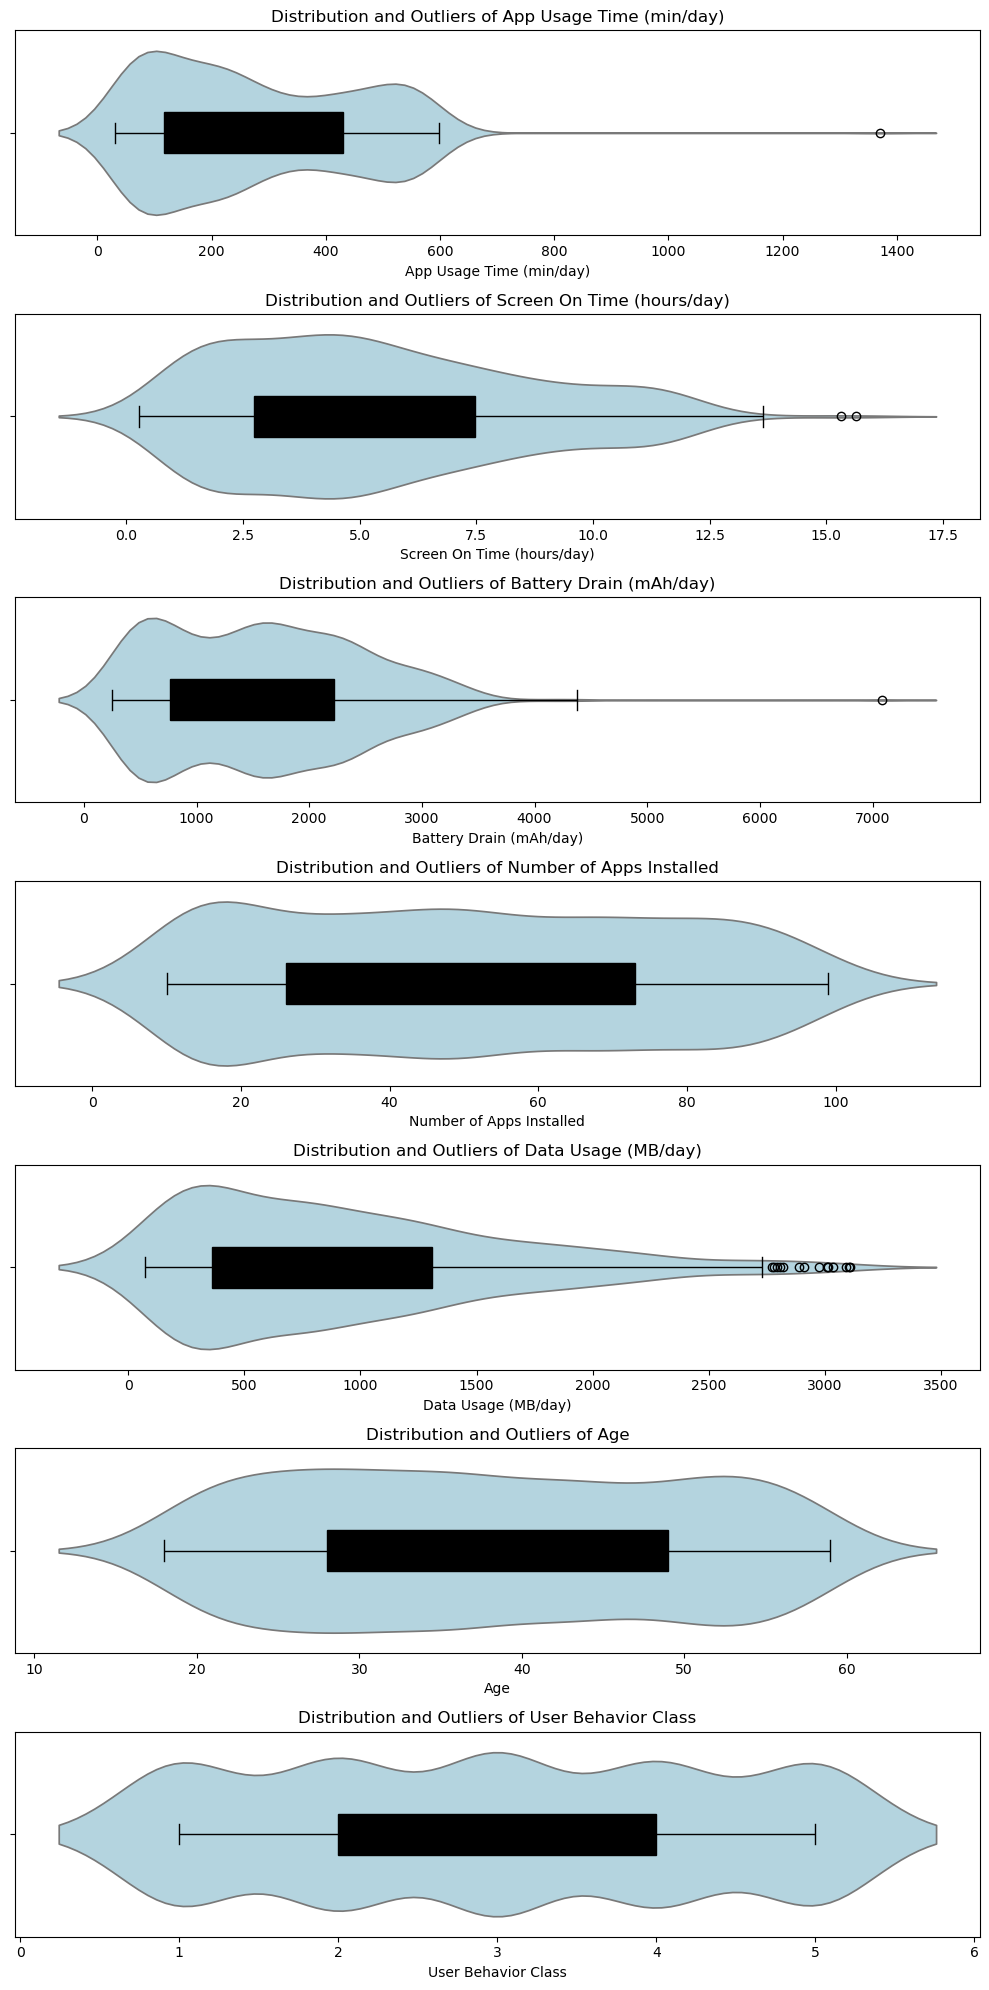

In [14]:
# Plot using seaborn's violinplot and overlay with boxplot for visualisation
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(10, 20))

for i, col in enumerate(numerical_cols):
    sns.violinplot(data=df, x=col, ax=axes[i], inner=None, color='lightblue')
    sns.boxplot(data=df, x=col, ax=axes[i], whis=1.5, width=0.2, color='black')
    axes[i].set_title(f'Distribution and Outliers of {col}')

plt.tight_layout()
plt.show() # Scroll for more details

#### Evaluation on the violin and box plot graphs:
From the violin and box plot graphs above, it appears that `App Usage Time (min/day)`, `Screen On Time (hours/day)`, `Battery Drain (mAh/day)` and `Data Usage (MB/day)` have outliers, thus it is necessary to handle these outliers by capping these extreme values to 99th percentile.This ensures that extreme values are replaced with a more reasonable threshold, retaining the overall distribution of the data.

In [16]:
# Handling outliers by capping to 99th percentile
for col in ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Data Usage (MB/day)']:
    upper_limit = df[col].quantile(0.99)
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

In [17]:
# Breakdown of categorical variables (Device Model, Operating System, Gender)
device_model_counts = df['Device Model'].value_counts()
os_counts = df['Operating System'].value_counts()
gender_counts = df['Gender'].value_counts()

display(device_model_counts)
print("\n", os_counts)
print("\n", gender_counts)

Device Model
Xiaomi Mi 11          154
iPhone 12             137
Google Pixel 5        130
OnePlus 9             128
Samsung Galaxy S21    125
Name: count, dtype: int64


 Operating System
Android    538
iOS        136
Name: count, dtype: int64

 Gender
Male      362
Female    312
Name: count, dtype: int64


##### **Data Exploration Summary:**

- The dataset contains 674 rows and across 11 columns.
- **Missing Values:**
    - Numerical Columns: Imputed with the median to ensure the central tendency of the data. 
    - Categorical Columns: Filled with the mode to maintain consistency across these variables.
- **Outliers:**
    - Outliers were present in numerical columns: `App Usage Time (min/day)`, `Screen On Time (hours/day)`, `Battery Drain (mAh/day)`, `Data Usage (MB/day)`. These outliers were capped at the 99th percentile to prevent extreme values from skewing while remaining the overall distribution of the data.

- **Categorical Variables:**
    - `Device Models`: The most common models are Xiaomi Mi 11 (154 users) and iPhone 12 (137 users), followed by Google Pixel 5 (130 users), OnePlus 9 (128 users), and Samsung Galaxy S21 (125 users).
    - `Operating Systems`: Android users make up the majority (538 users), while iOS users account for 136 users.
    - `Genders`: There are 362 male users and 312 female users, providing a nearly even split between genders.

### 3. Unvariate Analysis: Examine the data distributions after capping extreme values

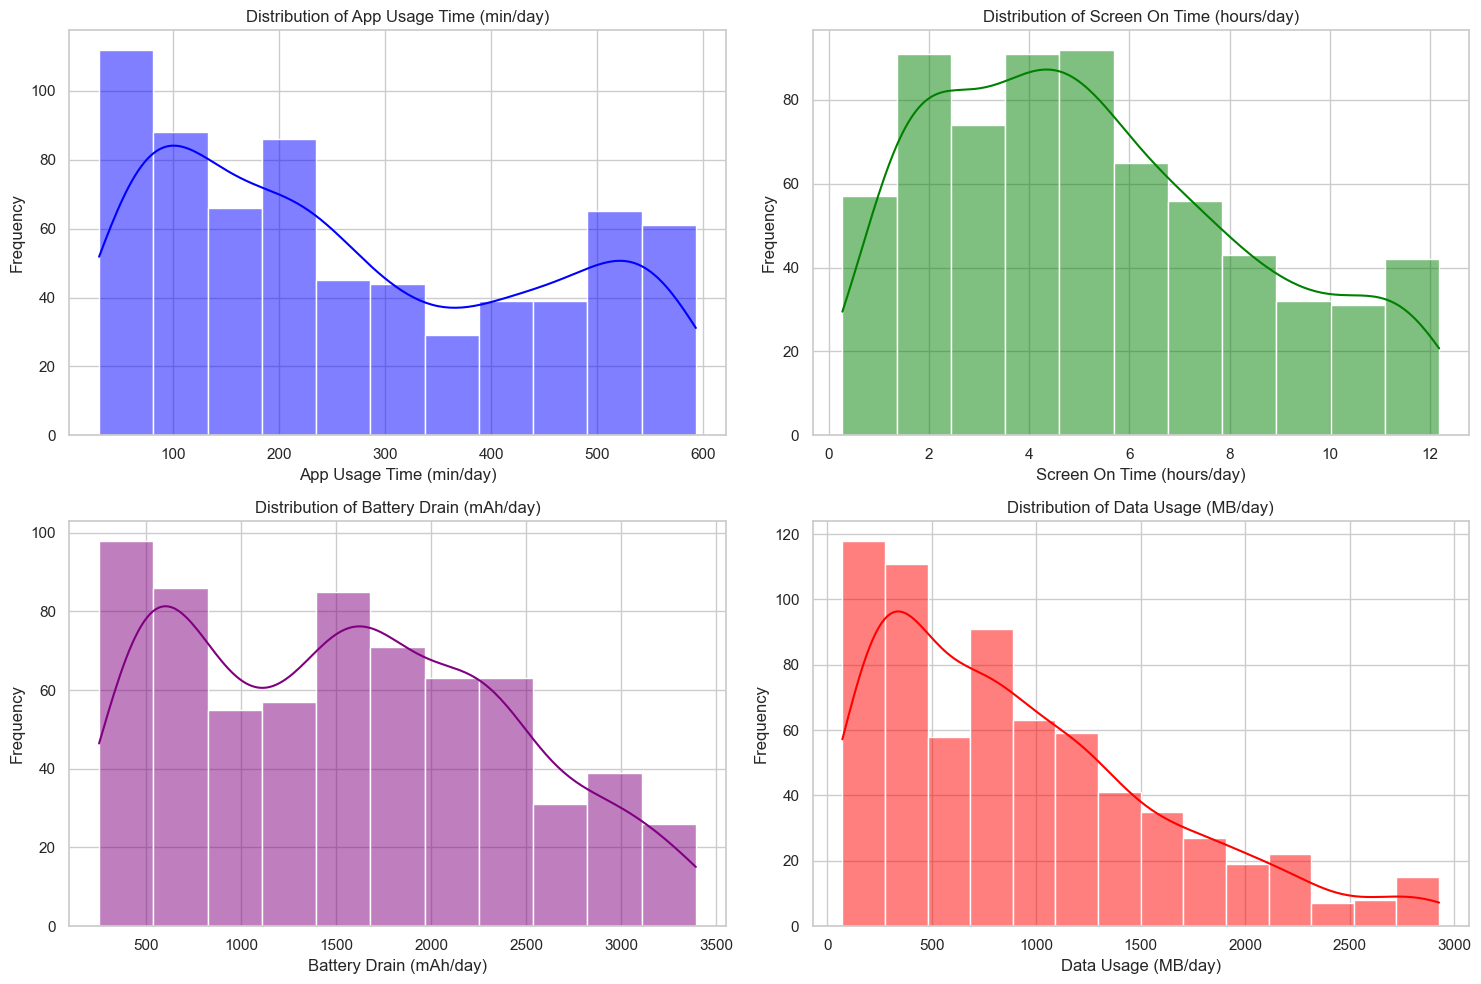

In [20]:
# Set the plot size and style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Checking the distribution of App Usage Time
plt.subplot(2, 2, 1)
sns.histplot(df['App Usage Time (min/day)'], kde=True, color='blue')
plt.title('Distribution of App Usage Time (min/day)')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Frequency')

# Distribution of Screen On Time
plt.subplot(2, 2, 2)
sns.histplot(df['Screen On Time (hours/day)'], kde=True, color='green')
plt.title('Distribution of Screen On Time (hours/day)')
plt.xlabel('Screen On Time (hours/day)')
plt.ylabel('Frequency')

# Distribution of Battery Drain
plt.subplot(2, 2, 3)
sns.histplot(df['Battery Drain (mAh/day)'], kde=True, color='purple')
plt.title('Distribution of Battery Drain (mAh/day)')
plt.xlabel('Battery Drain (mAh/day)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
sns.histplot(df['Data Usage (MB/day)'], kde=True, color='red')
plt.title('Distribution of Data Usage (MB/day)')
plt.xlabel('Data Usage (MB/day)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- **Distribution of App Usage Time (min/day)**
    - The distribution of app usage time appears to be bimodal, with multiple peaks around 100 and 500 minutes per day.
    - The highest frequency of app usage is concentrated under 100 minutes, indicating a tendency that a large portion of users use the app for shorter periods.
    - There is a downtrend in the middle (around 200-400 minutes), suggesting a reduced frequency of users with moderate usage levels. There is also a significant number of users spending higher times, having its peak around 500 minutes.

- **Distribution of Screen On Time (hours/day)**
    - The distribution of screen-on time is rightly skewed, with most of the users spending between 2 to 6 hours per day.
    - The peak is around 2-4 hours which is the most common range for screen-on activity among users.
    - There is a sharp decline after 6 hours, suggesting fewer users are engaging in prolonged screen-on time.
 
- **Distribution of Battery Drain (mAh/day)**
    - The histogram shows that battery drain is distributed in a uniform manner across various usage levels. This indicates that there is no single dominant usage pattern, but rather a diverse range of battery consumption behaviors among users.
    - A peak around 500 mAh/day indicates many users have low to moderate battery consumption, while consumption decreases gradually beyond 2000 mAh/day.
    - This varied distribution implies that battery usage is influenced by multiple factors like app useage, screen time, and device characteristics.
The presence of multiple peaks hints at distinct user groups, such as light, moderate, and heavy users, which could be further explored for segmentation analysis.
 
- **Distribution of Data Usage (MB/day)**
    - The data usage distribution is skewed to the right, with the highest mode around 300 to 500 MB/day.
    - The frequency of high data consumers (more than 1000 MB/day) decreases steadily, indicating fewer heavy data users.
    - The right tail of the distribution shows some very small increases, indicating that a small portion of users consumer significantly high data.

### 4. Bivariate Analysis: Pairplot and Correlation Analysis

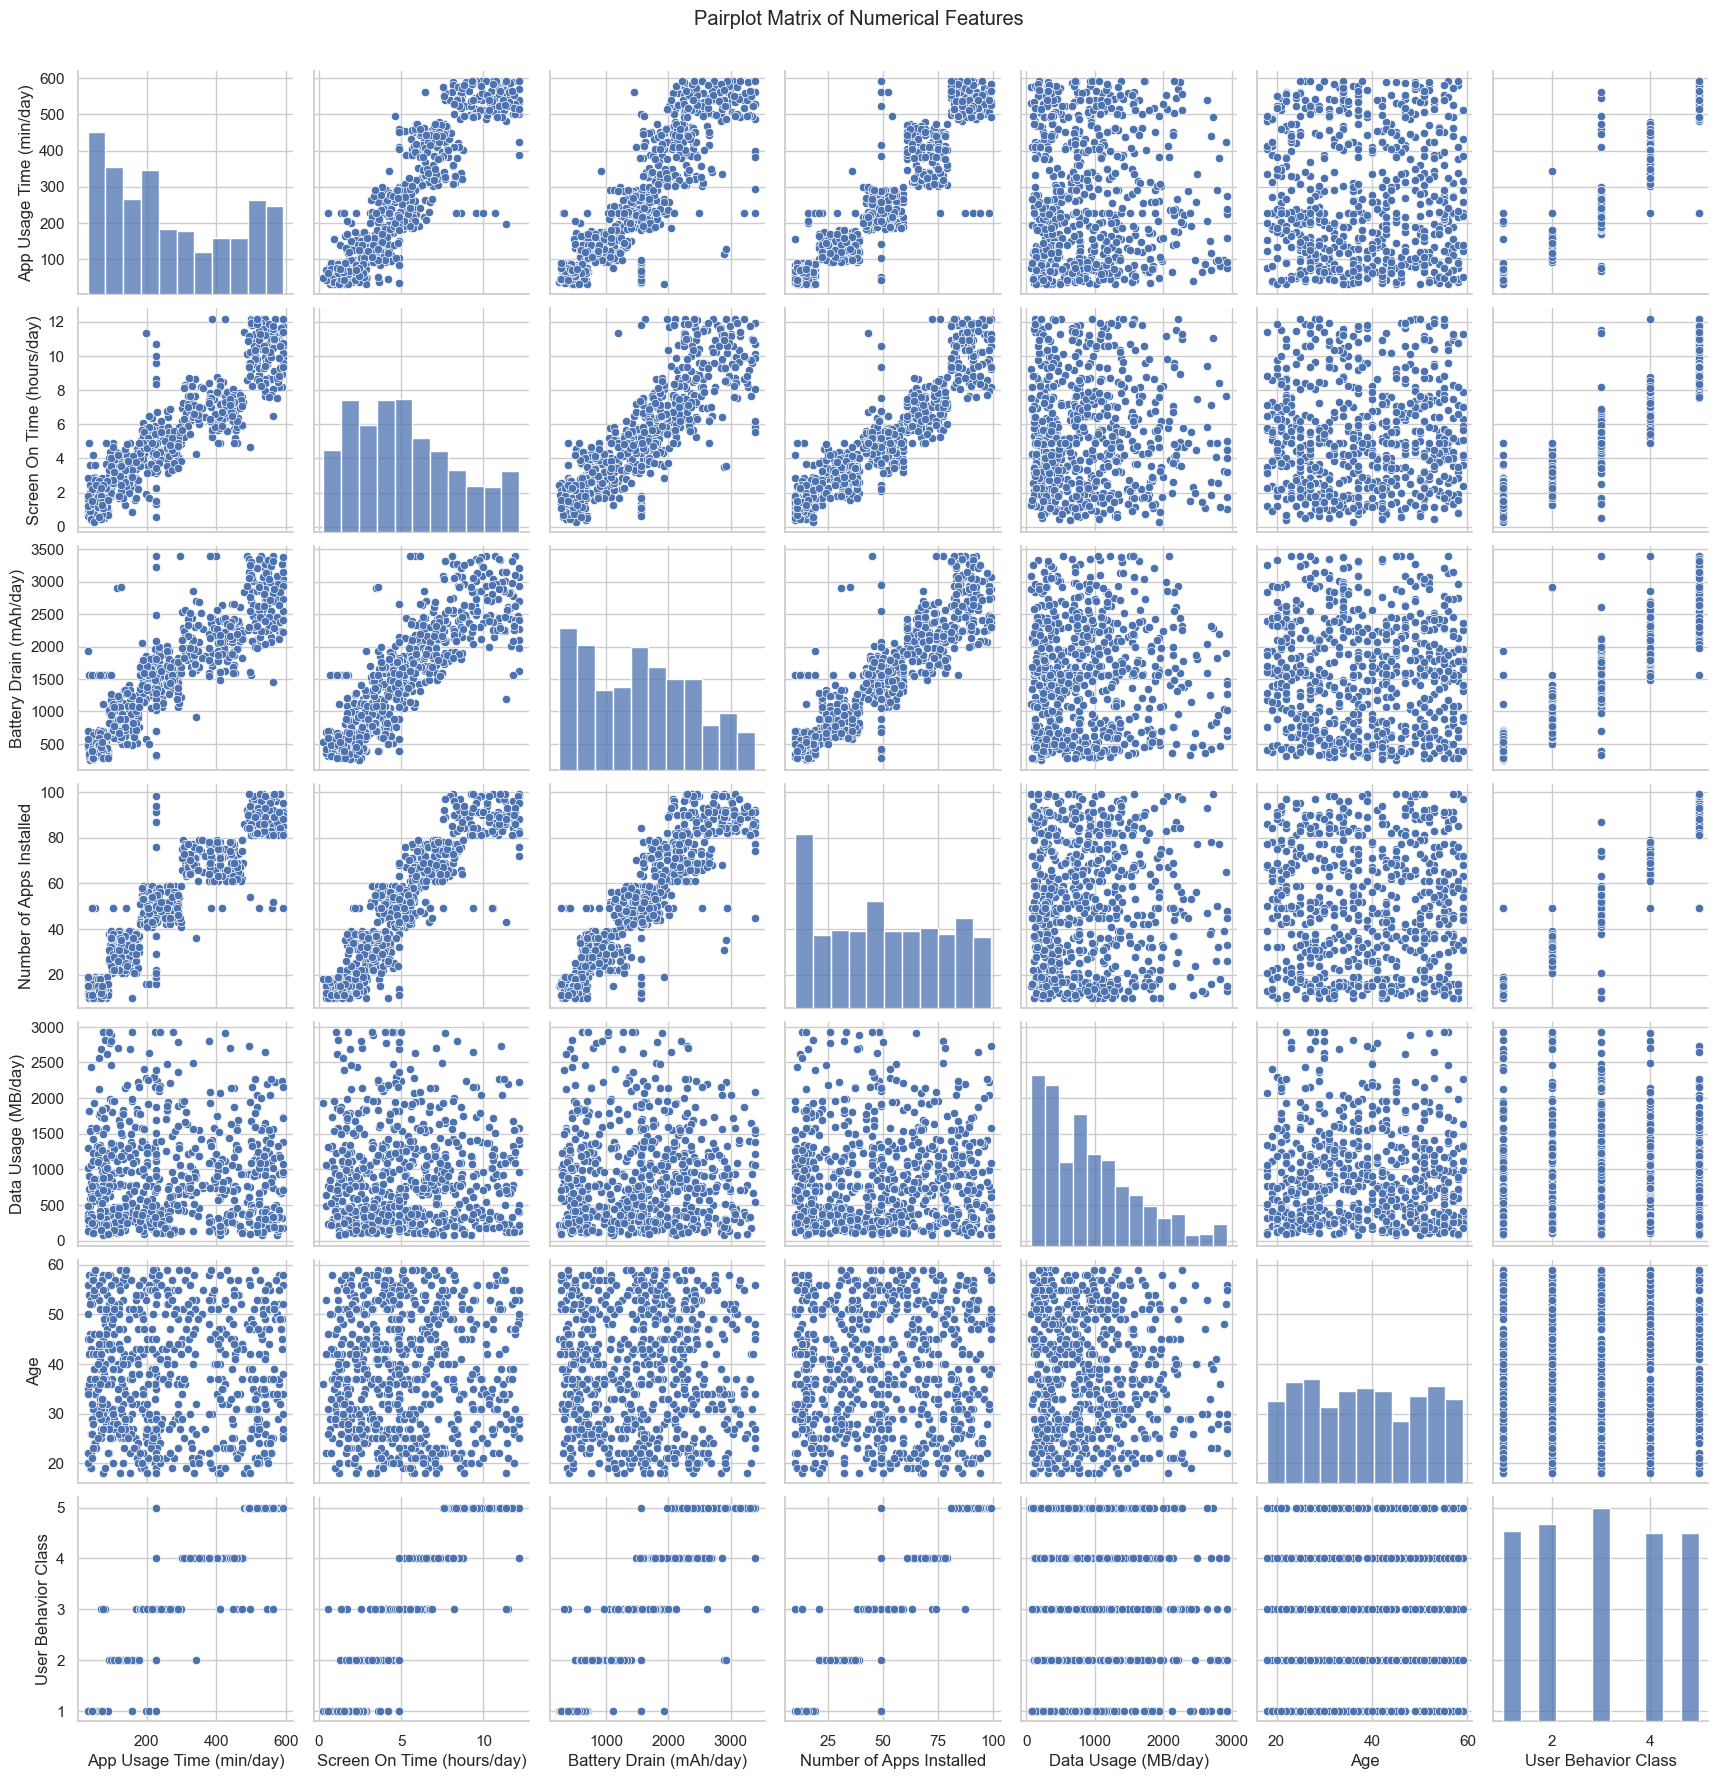

In [23]:
# Drop non-numeric columns for correlation analysis
df_numeric = df.select_dtypes(include=['float64', 'int64'])

sns.pairplot(df_numeric)
plt.suptitle('Pairplot Matrix of Numerical Features', y=1.02)
plt.show()

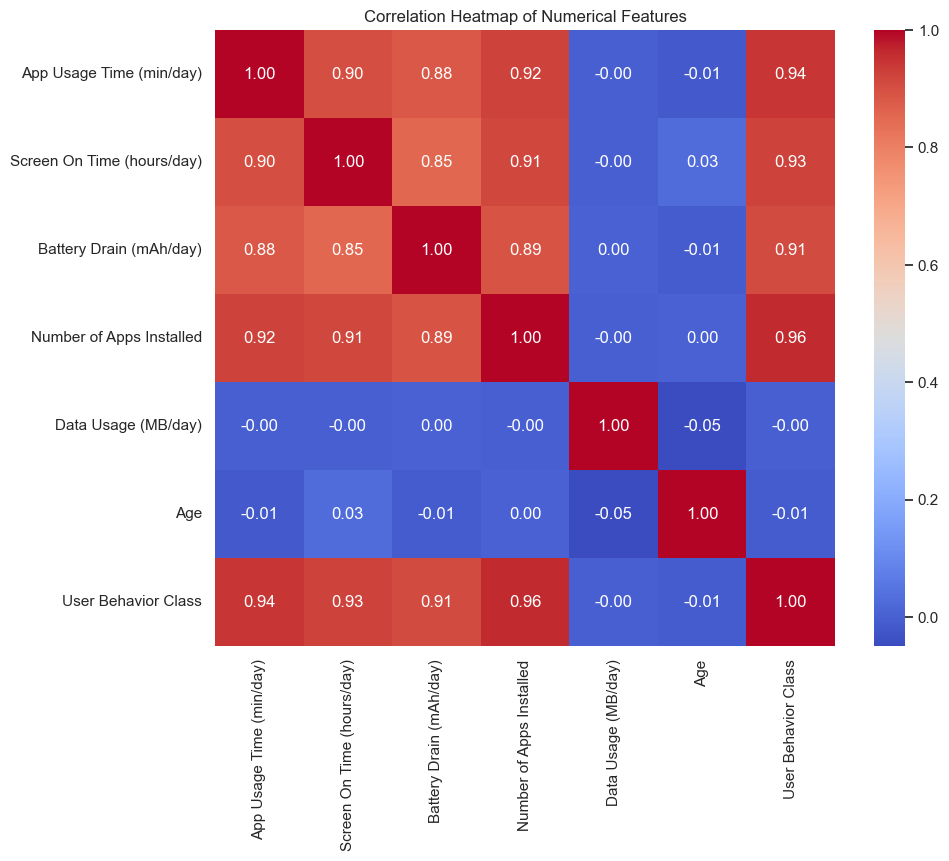

In [24]:
# Correlation matrix
correlation_matrix = df_numeric.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

**Strong Positive Correlations:** `App Usage Time(min/day)`, `Screen On Time(hours/day)`, `Battery Drain(mAh/day)`, and `Number of Apps Installed` exhibit strong positive correlations:

    - App Usage Time and Screen On Time (0.90)
    - App Usage Time and Battery Drain (0.88)
    - App Usage Time and Number of Apps Installed (0.92)
    - Screen On Time and Battery Drain (0.85)
    - Screen On Time and Number of Apps Installed (0.91)
    - Battery Drain and Number of Apps Installed (0.89)
These correlations suggest that users who spend more time using their apps also tend to have more apps installed, leading to increased battery consumption and screen-on time.

**User Behavior Class** (target variable) is strongly correlated with:

    - App Usage Time (0.94)
    - Screen On Time (0.93)
    - Battery Drain (0.91)
    - Number of Apps Installed (0.96)
This suggests that the features `App Usage Time`, `Screen On Time`, `Battery Drain`, and `Number of Apps Installed` are important indicators for categorising users into different behavior classes.

**Very low Correlations:** 
- `Data Usage` shows no significant correlation with any of the other features with correlation values close to 0. This suggests that data usage behavior is independent of app usage time, screen-on time, battery consumption, and other features in this dataset.
- `Age` also shows very low correlations (close to 0) with all other features, indicating that age does not have a meaningful impact on app usage time, battery drain, screen time, or data usage.

Overall, based on **the pairplot** and **correlation heatmap**, there are several the key factors that influence user behavior and segmentation:

- **Significant Influential Features:** `App Usage Time`, `Screen On Time`, `Battery Drain`, and `Number of Apps Installed` are the most influential factors on `User Behavior Class`. This is proven by the strong correlation values (ranging from 0.91 to 0.96) with User Behavior Class. With the strong correlation, these features together capture user engagement. This means that users who have high app usage times, extended screen-on time, and more apps installed tend to be categorised in similar behavior classes.

- **Factors with Little Influence:** `Data Usage` and `Age` exhibit extremely low correlations with User Behavior Class as well as other features. This indicates that data usage patterns and age are not significant factors of user behavior segmentation in this dataset.

## III. Clustering Analysis

#### Clustering Methodology
The K-means++ clustering algorithm is selected to segment users into different behavioral groups. It was chosen due to its efficiency in finding compact clusters and its straightforward interpretability, which helps in user behavior analysis.

In [28]:
# Selecting relevant features for user behavioural clustering
numerical_columns = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 
                     'Number of Apps Installed', 'Data Usage (MB/day)', 'Age']

# Subset the data for clustering
cluster_data = df[numerical_columns]

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

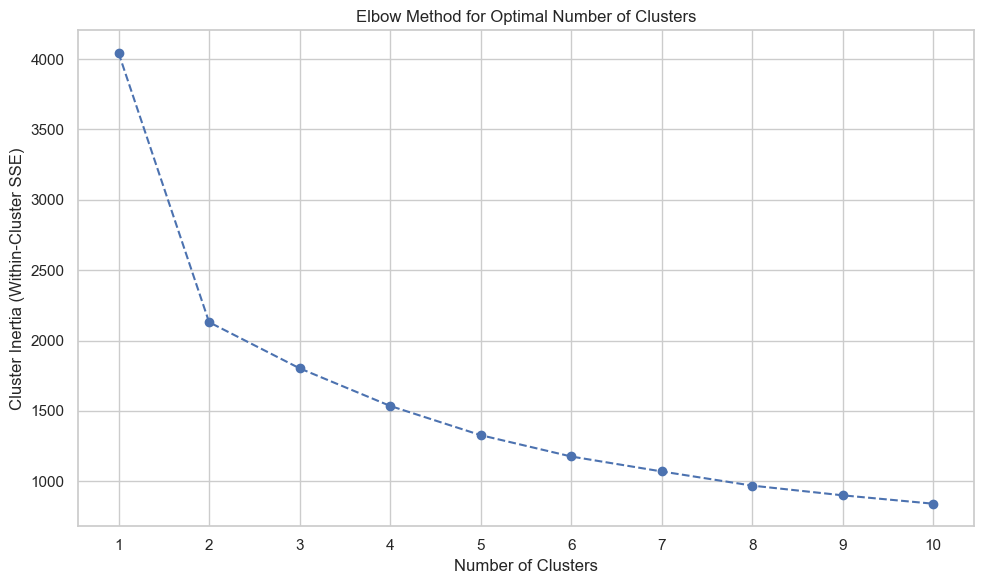

In [29]:
# Choosing the optimal number of clusters using the Elbow Method
inertias = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(scaled_data)
    inertias.append(km.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Inertia (Within-Cluster SSE)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(range(1, 11))
plt.tight_layout()
plt.show()

**Elbow Graph:** The graph shows a clear bend around 2 clusters, where the reduction in SSE (within-cluster variance) slows significantly after k=2. This indicates that 2 clusters may be the optimal number since adding more clusters leads to diminishing returns in variance reduction.

silhouette_avg: 0.40


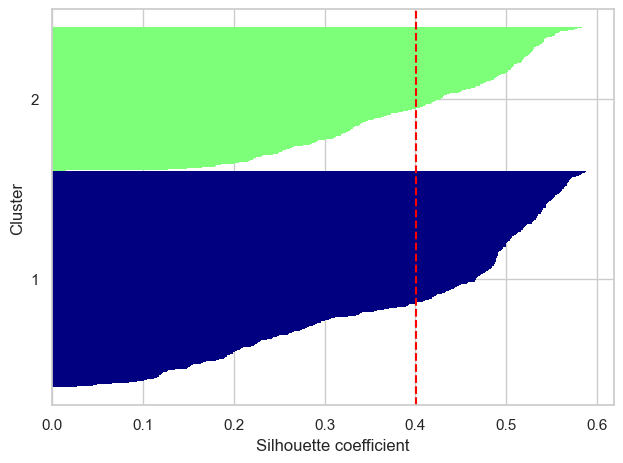

In [31]:
km = KMeans(n_clusters=2,  
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(scaled_data)
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(scaled_data, y_km, metric='euclidean')

## ------- plotting silhouette values -------

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
    
silhouette_avg = np.mean(silhouette_vals)
print(f'silhouette_avg: {silhouette_avg:.2f}')
plt.axvline(silhouette_avg, color="red", linestyle="--")

# Plot customisations
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

silhouette_avg: 0.31


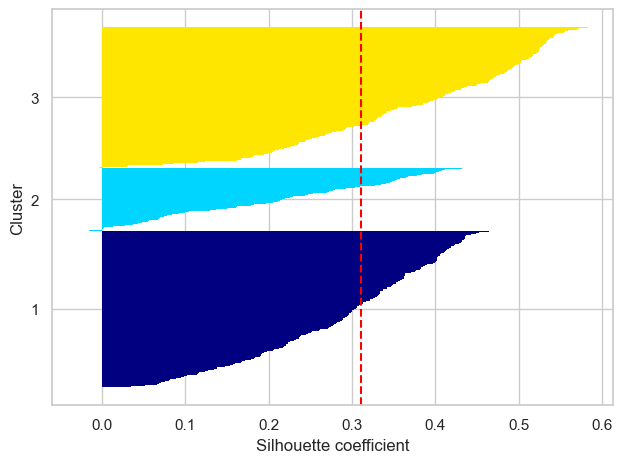

In [32]:
km = KMeans(n_clusters=3,  
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(scaled_data)
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(scaled_data, y_km, metric='euclidean')

## ------- plotting silhouette values -------

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
    
silhouette_avg = np.mean(silhouette_vals)
print(f'silhouette_avg: {silhouette_avg:.2f}')
plt.axvline(silhouette_avg, color="red", linestyle="--")

# Plot customisations
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

silhouette_avg: 0.26


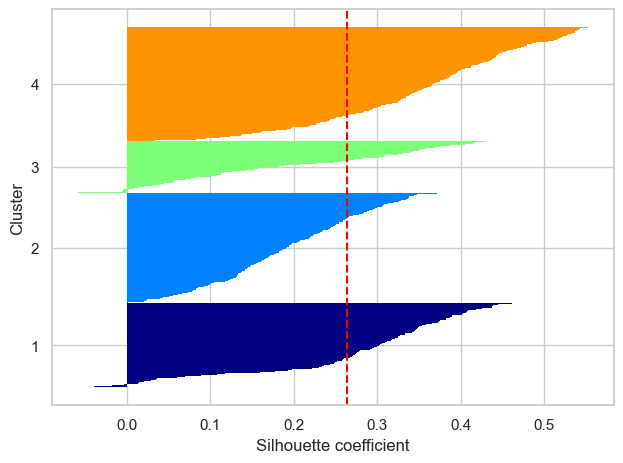

In [33]:
km = KMeans(n_clusters=4,  
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(scaled_data)
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(scaled_data, y_km, metric='euclidean')

## ------- plotting silhouette values -------

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
    
silhouette_avg = np.mean(silhouette_vals)
print(f'silhouette_avg: {silhouette_avg:.2f}')
plt.axvline(silhouette_avg, color="red", linestyle="--")

# Plot customisations
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

**Silhouette Score:** By comparing the nearest elbow point at k=2, 3 and 4. The highest average silhouette score is 0.42 at k=2, suggesting that most data points are quite well assigned to their respective clusters. This means the clusters are well-separated at k=2, with two bands exending to the right (closer to 1) and having consistent width.

In [35]:
# Step 1: Fit the K-means model with 2 clusters
km = KMeans(n_clusters=2,  
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km_2 = km.fit_predict(scaled_data)

# Extract the cluster centers
cluster_centers = km.cluster_centers_

# Count the number of customers in each cluster
cluster_counts = np.bincount(y_km_2)
kmeans_cluster_centers = pd.DataFrame(cluster_centers, columns = numerical_columns)

# Add the number of customers in each cluster to the DataFrame
kmeans_cluster_centers['Customer Count'] = cluster_counts

# Display the cluster centers with customer counts
print("KMeans++ Clustering Centers (k=2)")
display(kmeans_cluster_centers)

KMeans++ Clustering Centers (k=2)


,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Customer Count
0,-0.717046,-0.675203,-0.661161,-0.691495,-0.001196,0.016699,405
1,1.079567,1.016569,0.995428,1.041098,0.001801,-0.025141,269


#### Distinct user segments based on behavioural patterns:

- **Cluster 1 (405 users):**
    - This group exhibits a below average app usage, shown by negative standardised value (-0.717046).
    - Similarly, they have less screen time, lower battery drain, and fewer installed apps compared to the average users (-0.675203, -0.661161 and -0.691495, respectively).
    - Data usage and Age are very close to the mean, suggesting their data consumption is fairly typical and there's no clear distincction in age
    Insight: Cluster 1 seems to represent a group of users who are more conservative with their device usage, indicating light users who open fewer apps, spend less time on their devices, and consume less battery power.

- **Cluster 2 (269 users):**
    - This user group exhibits above-average app usage and screen time, shown by positive standardised values (1.079567 and 1.016569).
    - Also, they have higher battery drain, and more apps installed compared to the average (0.995428 and 1.041098)	
    - Like Cluster 1, the data usage and age are very close to the mean, highlighting data consumption is fairly typical and there's no clear distinction.
    - Insight: Cluster 2 seems to represent heavier device users who spend more time on their devices, use more apps, resulting in draining more battery.

**Key characteristics that define user clusters:** Based on the analysis above, key behavioual characteristics such as `App Usage Time (min/day)`, `Screen On Time (hours/day)`, `Battery Drain (mAh/day)`, and `Number of Apps Installed` aid to to distict users into **light or moderate users** and **heavy users**. However, `Age` and `Data Usage (MB/day)` do not appear to be major factors in defining user segments as these are consistent between both light and heavy users. These two features emphasise on the extreme low correlation values, further proved that Age and Data Useage cannot be categorised into different behavior classes.

- **Summary of Clusters:**
    - Cluster 1: Light or moderate users who spend less time on their devices.
    - Cluster 2: Heavy users who engage more intensively with their devices, resulting in higher app usage, screen time, and battery drain.

## IV. Prediction model (Logistic Regression and KNN)

#### **1. Handling categorical attributes**

In [39]:
# Encoding categorical variables: 'Device Model', 'Operating System', and 'Gender'
categorical_columns = ['Device Model', 'Operating System', 'Gender']

# Create a copy of the original data
df_encoded = df.copy()

# Apply one-hot encoding to categorical variables without reassigning them to the original columns
df_encoded = pd.get_dummies(df_encoded, columns=categorical_columns, drop_first=True)

# Display the first few rows of the one-hot encoded dataset
df_encoded.head()

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12,Operating System_iOS,Gender_Male
0,580.0,8.710654,3067.110978,87.0,936.044179,52.0,5.0,False,True,False,False,False,True
1,424.0,7.640538,1895.364099,65.0,2910.016467,52.0,4.0,False,False,True,False,False,True
2,236.0,3.882955,1408.256001,49.0,2100.828654,21.0,3.0,True,False,False,False,False,False
3,488.0,10.137477,3391.374673,92.0,536.309326,48.0,5.0,False,False,False,True,True,False
4,168.0,2.844959,882.167279,22.0,451.903999,50.0,2.0,False,False,True,False,False,False


#### **2. Logistic regression classification model:**

In [41]:
# Setting the target and independent attributes
X = df_encoded.drop(columns=['User Behavior Class']).values # features
y = df_encoded['User Behavior Class'].astype(int).values # target

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Test set prediction
y_pred_logreg_test = logreg.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_logreg_test)
f1_test = f1_score(y_test, y_pred_logreg_test, average='weighted')

# Train set prediction
y_pred_logreg_train = logreg.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_logreg_train)
f1_train = f1_score(y_train, y_pred_logreg_train, average='weighted')

print(f"Test Accuracy: {accuracy_test:.4f}, Test F1 Score: {f1_test:.4f}")
print(f"Train Accuracy: {accuracy_train:.4f}, Train F1 Score: {f1_train:.4f}")

Test Accuracy: 0.6667, Test F1 Score: 0.6649
Train Accuracy: 0.6753, Train F1 Score: 0.6712


#### Evaluation of Initial Logistic Regression Results

- **Training Performance:**

    - Train Accuracy: 67.53%
    - Train F1 Score: 67.12%
  
The training accuracy and F1 score indicate that the logistic regression model fits the training data moderately well. However, the metrics suggest that the model may not be able to capture all relevant patterns effectively. This is because logistic regression is a linear model that may struggle to learn complex, non-linear relationships.

- **Testing Performance:**

    - Test Accuracy: 66.67%
    - Test F1 Score: 66.49%

The testing performance is pretty close to the training performance, suggesting that the model is not overfitting. However, the overall performance is still moderate, with metrics around 66-67%. This suggests that the logistic regression model is struggling to make highly reliable predictions due to the complexity of user behavior and non-linear relationships between features.

**Insights from Logistic Regression:**
In our initial Logistic Regression, the model successfully provides a baseline results without overfitting, though it still exhibits clear limitations in predictive power. This may come from the fact that the dataset contains noisy, irrelevant data or multicollinearity features. The moderate accuracy and F1 score suggest the model's linear nature is not sufficient to fully capture the complexity of the dataset. 

Therefore, RFE technique could be implemented to improve the Logistic Regression accuracy by selecting only important features, thus enhance model performance. Then K-Nearest Neibors (KNN) with 5-fold cross-validation an be also applied to compare if KNN model can generalise better and provide a more robust measure of performance.

### 4. Feature selection using Recursive Feature Elimination (RFE):
RFE (Recursive Feature Elimination) is used to optimise the new logistic regression model by selecting the most relevant features and removing irrelevant ones. This process also helps eliminate misleading features that could distort distances in the KNN model, improving both models' performance and accuracy.|

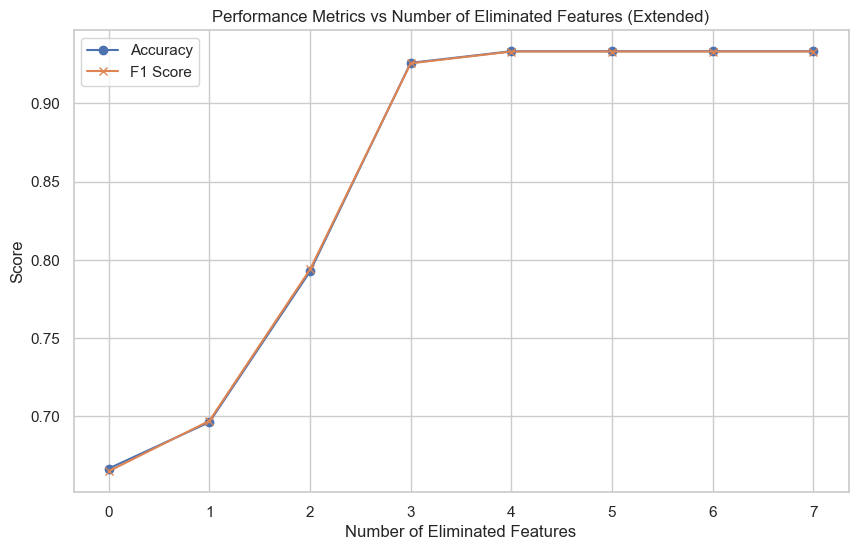

Optimal number of features based on F1 score: 5 features
Optimal number of features based on Accuracy: 5 features


In [44]:
# Running RFE (Recursive Feature Elimination)
total_features = X_train.shape[1]
accuracy_scores = []
f1_scores = []
eliminated_features = []

# RFE for each number of retained features
for n in range(5, total_features + 1):
    rfe = RFE(LogisticRegression(random_state=42, max_iter=1000), n_features_to_select=n)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)
    
    # Train logistic regression with selected features
    model_rfe = LogisticRegression(random_state=42, max_iter=1000).fit(X_train_rfe, y_train)
    
    # Evaluate on test set
    y_pred_rfe = model_rfe.predict(X_test_rfe)
    accuracy_scores.append(accuracy_score(y_test, y_pred_rfe))
    f1_scores.append(f1_score(y_test, y_pred_rfe, average='weighted'))
    eliminated_features.append(total_features - n)  # Number of eliminated features

# Plotting performance metrics
plt.figure(figsize=(10, 6))
plt.plot(eliminated_features, accuracy_scores, label='Accuracy', marker='o')
plt.plot(eliminated_features, f1_scores, label='F1 Score', marker='x')
plt.xlabel('Number of Eliminated Features')
plt.ylabel('Score')
plt.title('Performance Metrics vs Number of Eliminated Features (Extended)')
plt.legend()
plt.grid(True)
plt.show()

# Finding optimal number of features
optimal_f1_idx = np.argmax(f1_scores)
optimal_accuracy_idx = np.argmax(accuracy_scores)

optimal_f1_features = total_features - eliminated_features[optimal_f1_idx]
optimal_accuracy_features = total_features - eliminated_features[optimal_accuracy_idx]

print(f'Optimal number of features based on F1 score: {optimal_f1_features} features')
print(f'Optimal number of features based on Accuracy: {optimal_accuracy_features} features')

In [45]:
# Identify and display the list of retained features from the RFE process (5 features)
rfe = RFE(LogisticRegression(random_state=42, max_iter=1000), n_features_to_select=5)
rfe.fit(X_train, y_train)
retained_features_mask = rfe.support_

# Extract the names of the retained features
retained_features = df_encoded.drop(columns=['User Behavior Class']).columns[retained_features_mask]

# Display the retained features
print(retained_features)

Index(['Screen On Time (hours/day)', 'Number of Apps Installed',
       'Device Model_iPhone 12', 'Operating System_iOS', 'Gender_Male'],
      dtype='object')


**List of Optimal Features:** `Screen On Time (hours/day)`, `Number of Apps Installed`, `Device Model (iPhone 12)`, `Operating System (iOS)`, `Gender (Male)`

### 5. Improved Model: Logistic Regression
After selecting `Screen On Time (hours/day)`, `Number of Apps Installed`, `Device Model (iPhone 12)`, `Operating System (iOS)`, and `Gender (Male)` as important features through RFE, I will re-run the logistic regression to examine how well these selected features predict the target outcome and assess the model's overall performance and accuracy.

In [48]:
# Use the 5 selected features from the RFE process
selected_features = ['Screen On Time (hours/day)',
                     'Number of Apps Installed',
                     'Device Model_Xiaomi Mi 11',
                     'Device Model_iPhone 12',
                     'Gender_Male']

# Use the selected features from the cleaned dataset and perform a fresh train/test split
X = df_encoded[selected_features].values  # features
y = df_encoded['User Behavior Class'].astype(int).values  # target

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Test set prediction
y_pred_logreg_test = logreg.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_logreg_test)
f1_test = f1_score(y_test, y_pred_logreg_test, average='weighted')

# Train set prediction
y_pred_logreg_train = logreg.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_logreg_train)
f1_train = f1_score(y_train, y_pred_logreg_train, average='weighted')

print(f"Test Accuracy: {accuracy_test:.4f}, Test F1 Score: {f1_test:.4f}")
print(f"Train Accuracy: {accuracy_train:.4f}, Train F1 Score: {f1_train:.4f}")

Test Accuracy: 0.9333, Test F1 Score: 0.9331
Train Accuracy: 0.9592, Train F1 Score: 0.9592


#### Comparision between previous and current Logistic Regression model

By comparing the outputs between previous and current logistic regression models, it shows a clear improvement. The previous model had moderate accuracy (66% for both train and test) and similarly low F1 scores, suggesting difficulty in how well it handles precision and generalises data. However, the improved logistic regression model demonstrates a substantial improvement, with a test accuracy of 93.33% and a train accuracy of 95.92%. The F1 scores have also significantly increased, reaching 93.31% for testing and 95.92% for training. This suggests that the model has a stronger ability to manage precision and data generalisation  without overfitting.

### 6. Testing on K-Nearest Neighbors (KNN)

Despite this improvement, we will now test the KNN model, tuning its hyperparameters through 5-fold cross-validation, to see if it can further enhance accuracy by capturing non-linear patterns.

To optimise KNN model, I will test different values of K (number of neighbors) using 5-fold cross-validation. This method allows us to evaluate the model's performance on different data splits, minimizing the risk of overfitting or underfitting. While logistic regression has performed well in this case, we will now apply KNN and cross validation to see if it can match or exceed the performance of Logistic Regression by handling potential nonlinear patterns in the data.

In [51]:
# Use the 5 selected features from the RFE process
selected_features = ['Screen On Time (hours/day)',
                     'Number of Apps Installed',
                     'Device Model_Xiaomi Mi 11',
                     'Device Model_iPhone 12',
                     'Gender_Male']

# Use the selected features from the cleaned dataset and perform a fresh train/test split
X = df_encoded[selected_features].values  # features
y = df_encoded['User Behavior Class'].astype(int).values  # target

# Perform train/test split again with correct alignment
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now we'll proceed with grid search on the KNN model
knn = KNeighborsClassifier()

# Set the hyperparameter grid (K values from 1 to 30)
param_grid = {'n_neighbors': range(1, 31)}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_selected, y_train)

# Report the best K and performance metrics
best_k = grid_search.best_params_['n_neighbors']
best_accuracy = grid_search.best_score_

# Train the final KNN model with the best K and evaluate on the test set
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_selected, y_train)
y_pred_best = knn_best.predict(X_test_selected)

test_accuracy = accuracy_score(y_test, y_pred_best)

print('Best K value: ', best_k)
print('The accuracy on training data: ', best_accuracy)
print('The accuracy on testing data:', test_accuracy)

Best K value:  7
The accuracy on training data:  0.9758393907926619
The accuracy on testing data: 0.9259259259259259


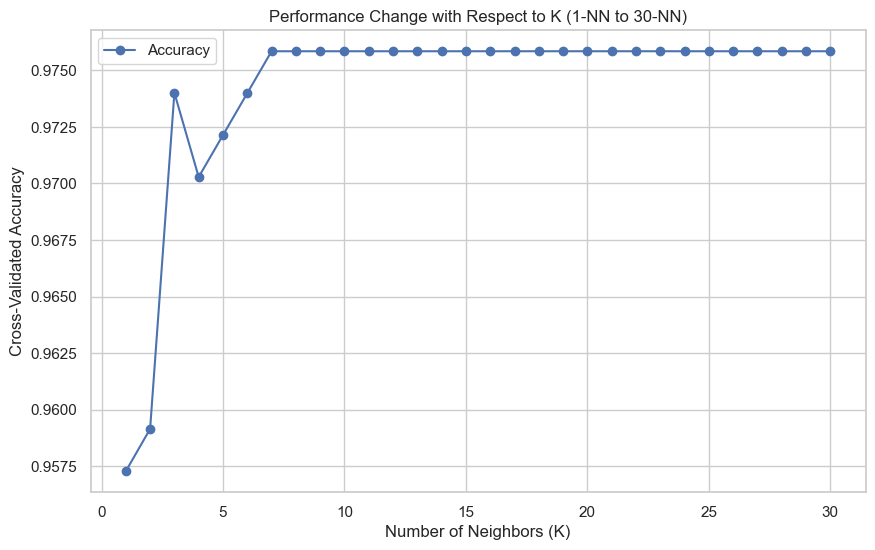

In [52]:
# Visualise the performance change (mean cross-validated accuracy) with respect to K
k_values = range(1, 31)
mean_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_scores, marker='o', label='Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Performance Change with Respect to K (1-NN to 30-NN)')
plt.grid(True)
plt.legend()
plt.show()

#### KNN Hyperparameter Tuning Analysis:

- **Accuracy Variation with K:**
    - The graph "Performance Change with Respect to K (1-NN to 30-NN)" shows how accuracy changes with different values of K. At first, the accuracy increases as K grows, with fluctuations up to K = 7, after that it stabilises at constant level. Smaller values of K (e.g., K=1 to 3) tend to overfit as being sensitive to noise, while larger K values provide a more generalised (but less nuanced) prediction.
 
- **Identifying Peak Performance:**
    - The highest accuracy is observed at K = 7. The accuracy remained high from K = 7 onward, indicating that increasing K beyond this value doesn’t significantly enhance performance. This pattern aligns with KNN modeling behavior: lower K values may overfit by capturing specific data points, while larger K values may underfit by averaging out over neighbors, reducing the model ability to identify specific nuances in the data.

- **Optimal K Value:**
    - From the analysis above, K = 7 is identified as the best value since it provides the highest accuracy without overfitting, offering a balance between bias and variance, delivering reliable performance.

#### Outcome evaluation:

- **Training Accuracy:** The accuracy on the training set with K = 7 is approximately **97.58%**, which suggests the model effectively learns from the training data and captures patterns well.
- **Testing Accuracy:** The test accuracy is **92.59%**, which reflects the model’s capability to generalise effectively to unseen data. The relatively close gap between training and test accuracy proves that the model is not overfitting, thus, offering consistent predictive power for both known and new data.

#### Outcome evaluation:

Overall, tuning K to 7 has balanced complexity and performance of the model, leading to high accuracy while ensuring the model is robust and not overfitted.The remained high in accuracy beyond K = 7 suggests that this value is optimal for the dataset and that further increasing K would not significantly improve predictive accuracy. The consistent performance between training and test sets shows that hyperparameter tuning has effectively optimised the model, with a balance between capturing data patterns and avoiding excessive sensitivity to individual data points.

## VII. Comparision between improved Logistic Model and K-Nearest Neighbors Model

**Training Accuracy**:
- The KNN model with the best K value of 7 achieved a higher training accuracy (97.58%) compared to logistic regression (95.92%). This suggests that KNN might be fitting the training data slightly better, likely due to its ability to capture more complex patterns.

**Test Accuracy:**
- Logistic regression has a slightly better test accuracy (93.33%) compared to KNN (92.59%). This indicates that while KNN performs well, logistic regression generalises a bit better on unseen test data.

Overall, in comparing KNN and logistic regression, KNN achieved a higher training accuracy (97.58%) but had a larger drop in test accuracy (92.59%), indicating potential overfitting. Logistic regression showed better data generalisation with a smaller gap between training (95.92%) and test accuracy (93.33%). This suggests that while KNN fits the training data better, logistic regression offers more consistent performance on unseen data, making it a better choice for generalisation. Additionally, logistic regression provides greater interpretability, which may be advantageous depending on the context.

### VIII. Conclusion

In short, through this analysis, the three models: K-Means Clustering, Logistic Regression, and K-Nearest Neighbors (KNN) have been applied to classify and predict user behavior. 

**K-Means++ Clustering** was implemented to segment users into distinct groups based on behavioral attributes, such as app usage time, screen-on time, battery drain, and the number of apps installed. This unsupervised approach segmented users into two clusters:

- **Cluster 1**: Light or moderate users who spend less time on their devices.
- **Cluster 2**: Heavy users who engage more intensively with their devices, resulting in higher app usage, screen time, and battery drain.

**Logistic Regression** was used as a predictive model to classify user behavior into the defined segments. The model's test accuracy of 0.6667 and test F1 score of 0.6649 indicate that it has moderately power in predicting user behavior. Though, the train accuracy of 0.6753 and train F1 score of 0.6712 show that the model performs consistently on both training and test data, indicating that it is not overfitting and generalises well.

**K-Nearest Neighbors (KNN)** was then applied as an improved predictive model to enhance classification accuracy and evaluate non-linear relationships between features. After parameter tuning, the optimal k=7 provided an accuracy of 0.9758 on training and 0.9259 on the test data. This performance indicates that KNN model has captured complex, non-linear relationships and effectively distinguishes user segments.

By comaring the two models, KNN achieved higher training accuracy but showed signs of overfitting, while logistic regression provided better generalisation with more consistent test performance. Therefore, Logistic regression is considered more reliable model for this dataset, offering a balance between accuracy and interpretability.

To conclude, the implications of these clustering and prediction models together help to understand and forecast user behavior. K-Means++ clustering produces valuable insights into underlying patterns, while logistic regression and KNN models helped to turn insights into actionable predictions. Overall, these approaches aided to generage accurate user segmentation and prediction of user behavior, highlighting how the complementary of modeling techniques can enhance prediction capabilities and strengthen our understanding of user engagement patterns.